# Clase 1 - Red Neuronal con Numpy
<br/>

## Curso de Especialización en Inteligencia Artificial
## Analisis profundo

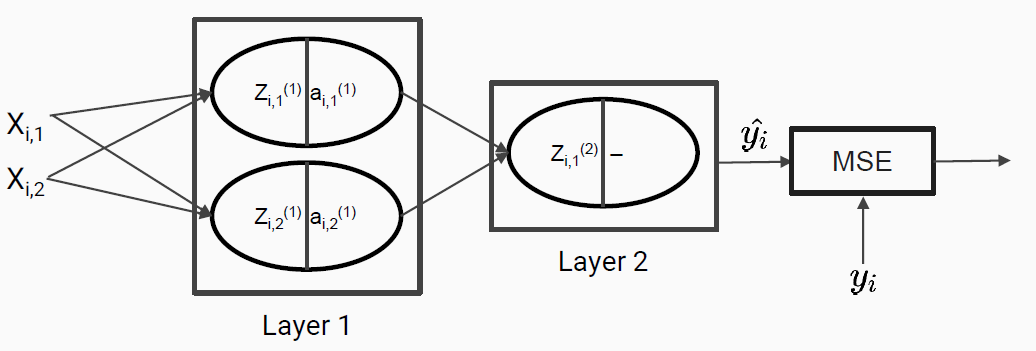

In [8]:
import numpy as np

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
from matplotlib import pyplot as plt
plt.style.use(['grayscale'])
plt.rcParams['figure.figsize'] = (20, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 20

In [10]:
class NeuralNetwork():
    """
    Modelo de red neuronal simple con numpy
    """
    W1_1 = None # weights from neuron 1 layer 1
    W2_1 = None # weights from neuron 2 layer 1
    W1_2 = None # weights from neuron 1 layer 2
    
    def __init__(self):
        pass
    
    
    def sigmoid(self, x):
        g_x = 1 / (1 + np.exp(-x))
        return g_x
        
        
    def fit(self, X, y, lr=0.1, epochs=20000):
        
        # MSE over epochs
        mse_epoch = []
        
        # Add a column fill with 1s to X to allow the vectorized calculation
        X = np.append(X, np.ones(shape=(X.shape[0],1)), axis = 1) 
        
        n = X.shape[0] # number of samples
        m = X.shape[1] # number of features
        
        # initialize weights random
        W1_1 = np.random.random(size=(m, 1))
        W2_1 = np.random.random(size=(m,1))
        W1_2 = np.random.random(size=(3,1))
        
        # iterate over the n_epochs
        for j in range(epochs):

            # Shuffle all the samples 
            idx = np.random.permutation(X.shape[0])
            X = X[idx]
            y = y[idx]
            
            # Reset the loss function
            mse=0

            # Iterate over the dataset
            for i in range(n):

                # Forward propagation
                z1 = X[i,:]@W1_1
                z1 = z1[0]
                a1 = self.sigmoid(z1)
                
                z2 = X[i,:]@W2_1
                z2 = z2[0]
                a2 = self.sigmoid(z2)
                
                x1_2 = np.array([a1,a2,1])
                z3 = x1_2@W1_2
                z3 = z3[0]
                a3 = self.sigmoid(z3)
                
                prediction = a3
                
                # Calculate the error 
                error = np.power(y[i] - prediction,2)
                # Acumulate loss
                mse = mse + error
                
                # Calculate the gradient
                grad_W1_2 = (-2/n) * (y[i] - prediction) * self.sigmoid(z3) * (1-self.sigmoid(z3)) * x1_2
                grad_W2_1 = (-2/n) * (y[i] - prediction) * self.sigmoid(z3) * (1-self.sigmoid(z3)) * W1_2[1] * \
                            self.sigmoid(z2) * (1-self.sigmoid(z2)) * X[i,:]
                grad_W1_1 = (-2/n) * (y[i] - prediction) * self.sigmoid(z3) * (1-self.sigmoid(z3)) * W1_2[0] * \
                            self.sigmoid(z1) * (1-self.sigmoid(z1)) * X[i,:]
                
                # Back propagation
                W1_2 = W1_2 - (lr * grad_W1_2[:,np.newaxis])
                W2_1 = W2_1 - (lr * grad_W2_1[:,np.newaxis])
                W1_1 = W1_1 - (lr * grad_W1_1[:,np.newaxis])
            
            # Calculate mse
            mse_epoch.append(mse/4)
            
            # Print mse over epochs/10
            if (j % (epochs/10)) == 0:
                print("Epoch ",j," MSE: ",mse)
        
        # Save training parameters in class variables
        self.W1_1 = W1_1
        self.W2_1 = W2_1
        self.W1_2 = W1_2
        
        return mse_epoch
    
    def predict(self,X):
        
        # Add a column fill with 1s to X to allow the vectorized calculation
        X=np.append(X, np.ones(shape=(X.shape[0],1)), axis = 1)
        n = X.shape[0]
        
        prediction = []
        
        # Iterate over the dataset
        for i in range(n):
            # Forward propagation
            z1 = X[i,:]@self.W1_1
            z1 = z1[0]
            a1 = self.sigmoid(z1)
            
            z2 = X[i,:]@self.W2_1
            z2 = z2[0]
            a2 = self.sigmoid(z2)
            
            x1_2 = np.array([a1,a2,1])
            z3 = x1_2@self.W1_2
            z3 = z3[0]
            a3 = self.sigmoid(z3)
            
            prediction.append(a3)

        return np.array(prediction)

In [11]:
# Dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])

# Model training
model = NeuralNetwork()
mse_epoch = model.fit(X,y)

Epoch  0  MSE:  1.1799333587339058
Epoch  2000  MSE:  0.9841707693098152
Epoch  4000  MSE:  0.8642582786330928
Epoch  6000  MSE:  0.6668264829626576
Epoch  8000  MSE:  0.24356360950647638
Epoch  10000  MSE:  0.07256586023321004
Epoch  12000  MSE:  0.037041089626102454
Epoch  14000  MSE:  0.023948403400576718
Epoch  16000  MSE:  0.017419667516689656
Epoch  18000  MSE:  0.013577150544115391


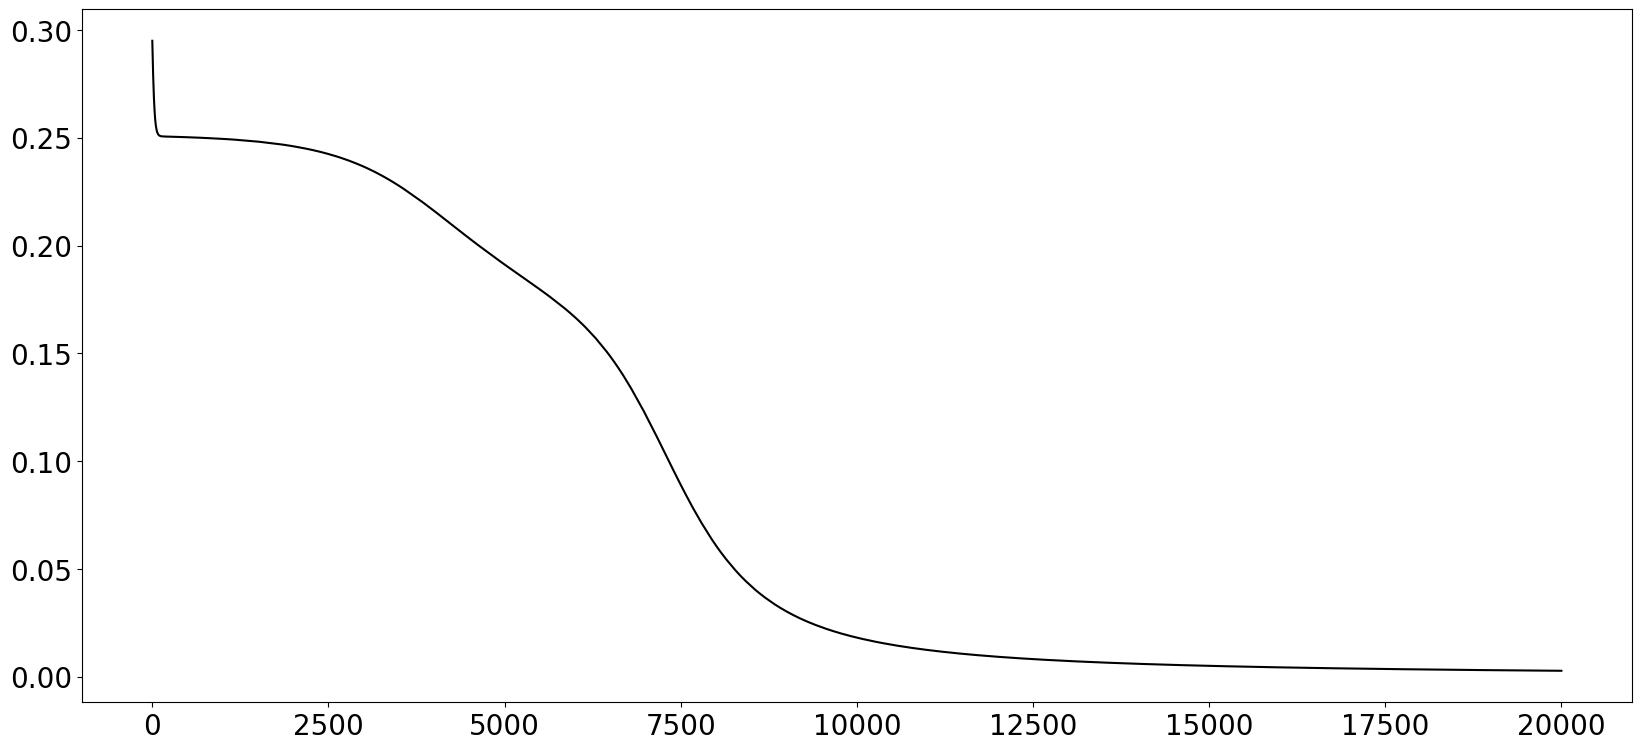

In [12]:
# Training MSE plot
plt.plot(mse_epoch)

In [5]:
# Predictions over training dataset
print(f'Real: {y}')
print(f'Predicted: {model.predict(X)}')

Real: [0 1 1 0]
Predicted: [0.05450146 0.95003851 0.94984559 0.05399059]
